In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px

In [9]:
# import all codes from run_analysis.ipynb
%run run_analysis.ipynb

# 0: Understanding of ESG scores

In [10]:
esg_scores = esg[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

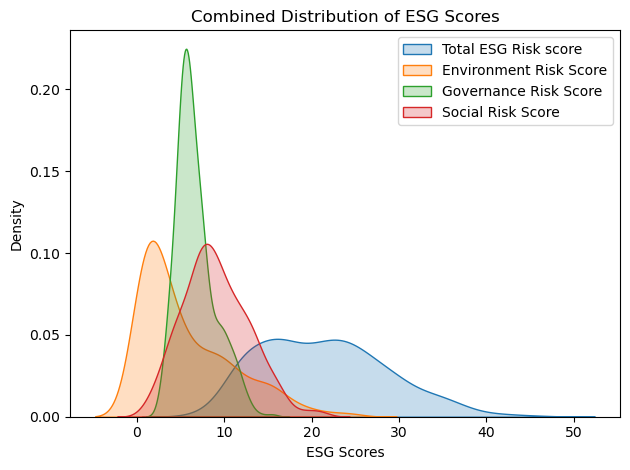

In [11]:
for i, col in enumerate(esg_scores.columns):
    sns.kdeplot(esg_scores[col],label=col, fill=True)

plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')
plt.legend()
plt.tight_layout()
plt.show()

# 1.  Geography & ESG

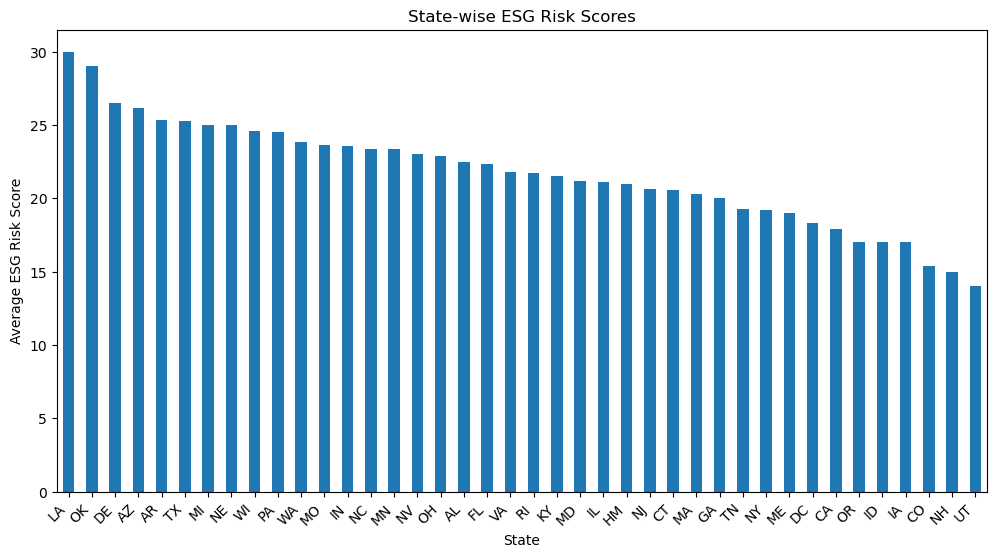

In [12]:
groupby_geo = esg.groupby('state')['Total ESG Risk score'].agg('mean').sort_values(ascending=False)

# Visualize the state-wise ESG scores
plt.figure(figsize=(12, 6))
groupby_geo.plot(kind='bar')
plt.title('State-wise ESG Risk Scores')
plt.ylabel('Average ESG Risk Score')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# use a map to illustrate the result
fig = go.Figure(data=go.Choropleth(
    locations=groupby_geo.index, # Spatial coordinates
    z = groupby_geo, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Risk Score",
))

fig.update_layout(
    title_text = 'State-wise ESG Risk Scores',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [16]:
gro_gdp_esg = pd.merge(state_name_gdp,groupby_geo_df,on='state_abbreviation')

In [17]:
# relationship between gdp & average ESG risk score
# because the esg report was released in 2023, thus only use gdp_2023 data
# no correlation
corr_esg_gdp = gro_gdp_esg[['gdp_2023','average ESG scores']].corr()
corr_esg_gdp

gdp_2023  average ESG scores
gdp_2023            1.000000           -0.293707
average ESG scores -0.293707            1.000000

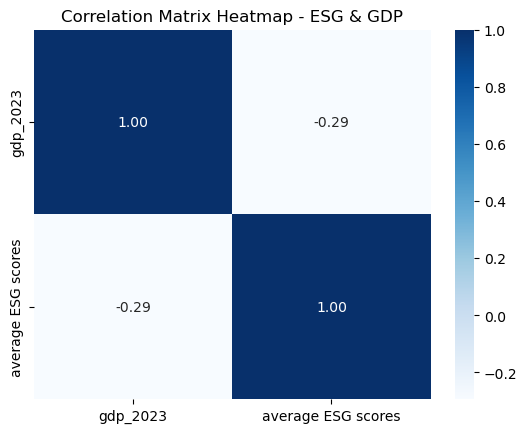

In [18]:
# heatmap
sns.heatmap(corr_esg_gdp, annot=True,cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix Heatmap - ESG & GDP')
plt.show()

In [19]:
# relationship between (gdp)change_percentage & average ESG score
# negative corrlation
corr_esg_gdp_change = gro_gdp_esg[['change_percentage','average ESG scores']].corr()
corr_esg_gdp_change

change_percentage  average ESG scores
change_percentage            1.000000           -0.646672
average ESG scores          -0.646672            1.000000

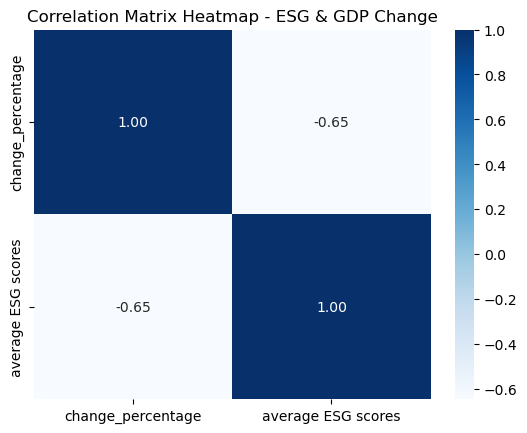

In [20]:
sns.heatmap(corr_esg_gdp_change, annot=True,cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix Heatmap - ESG & GDP Change')
plt.show()

# 2.  Sector/Industry & ESG

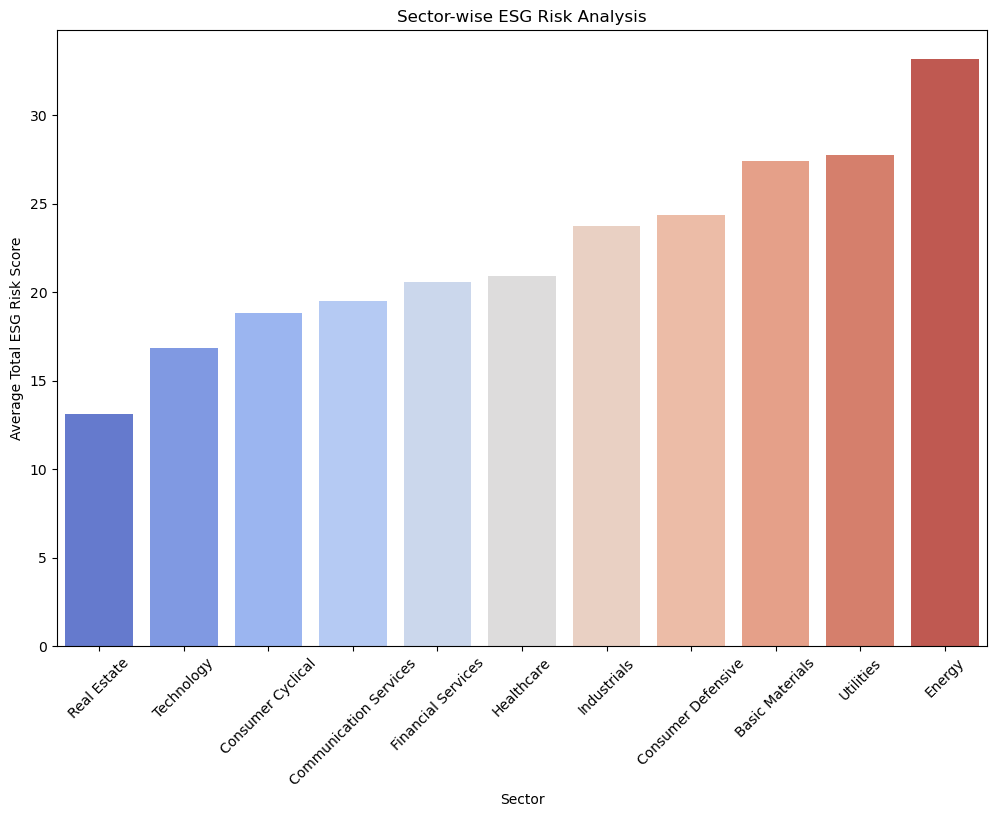

In [22]:
# Create a bar plot for the sector-wise average ESG risk scores
# ranking
sector_total = esg.groupby('Sector')['Total ESG Risk score'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_total.index, y=sector_total.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Sector-wise ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

In [23]:
# combined scores analysis
sector_avg_scores = esg.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()
custom_colors = {
    'Environment Risk Score':'skyblue',
    'Governance Risk Score':'salmon',
    'Social Risk Score':'lightgreen'
}

fig_sector = px.bar(sector_avg_scores, x='Sector', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                    title='Sector-wise Average ESG Scores',
                    labels={'value': 'Average Score', 'variable': 'ESG Component'},
                    color_discrete_map=custom_colors) 

fig_sector.update_xaxes(categoryorder='total ascending')
fig_sector.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig_sector.show()

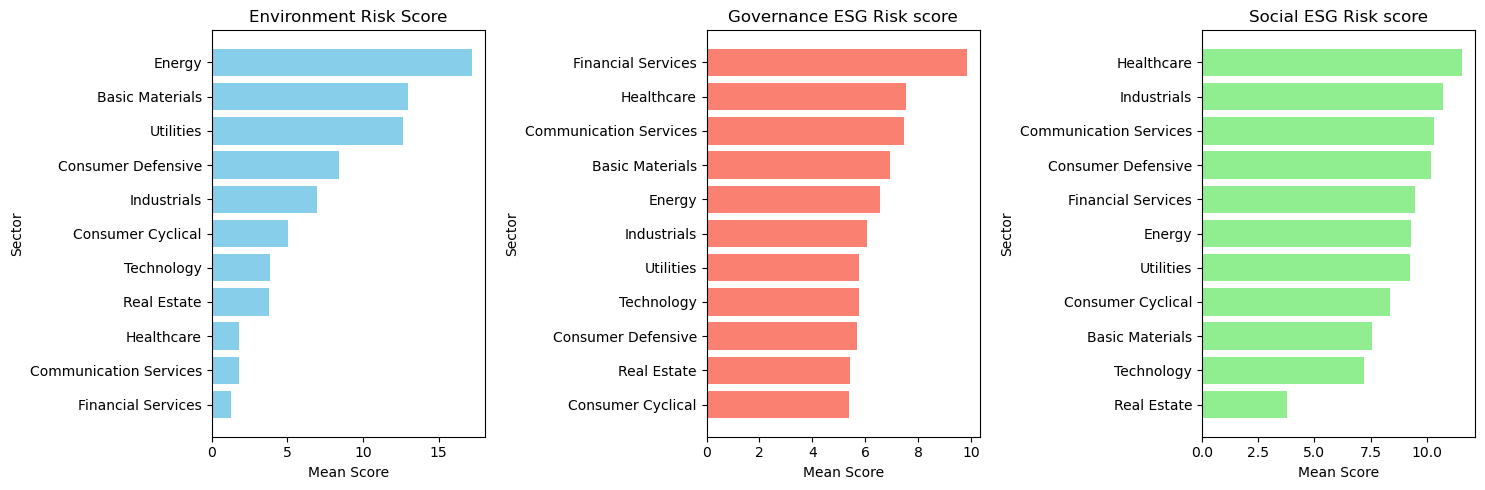

In [24]:
# subplot of ESG based on sector
# ranking
# interesting
sector_E = esg.groupby('Sector')['Environment Risk Score'].mean().sort_values()
sector_S = esg.groupby('Sector')['Governance Risk Score'].mean().sort_values()
sector_G = esg.groupby('Sector')['Social Risk Score'].mean().sort_values()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Environment Risk Score
axs[0].barh(sector_E.index, sector_E.values, color='skyblue')
axs[0].set_title('Environment Risk Score')
axs[0].set_xlabel('Mean Score')
axs[0].set_ylabel('Sector')

# Governance ESG Risk score
axs[1].barh(sector_S.index, sector_S.values, color='salmon')
axs[1].set_title('Governance ESG Risk score')
axs[1].set_xlabel('Mean Score')
axs[1].set_ylabel('Sector')

# Social ESG Risk score
axs[2].barh(sector_G.index, sector_G.values, color='lightgreen')
axs[2].set_title('Social ESG Risk score')
axs[2].set_xlabel('Mean Score')
axs[2].set_ylabel('Sector')

plt.tight_layout()
plt.show()

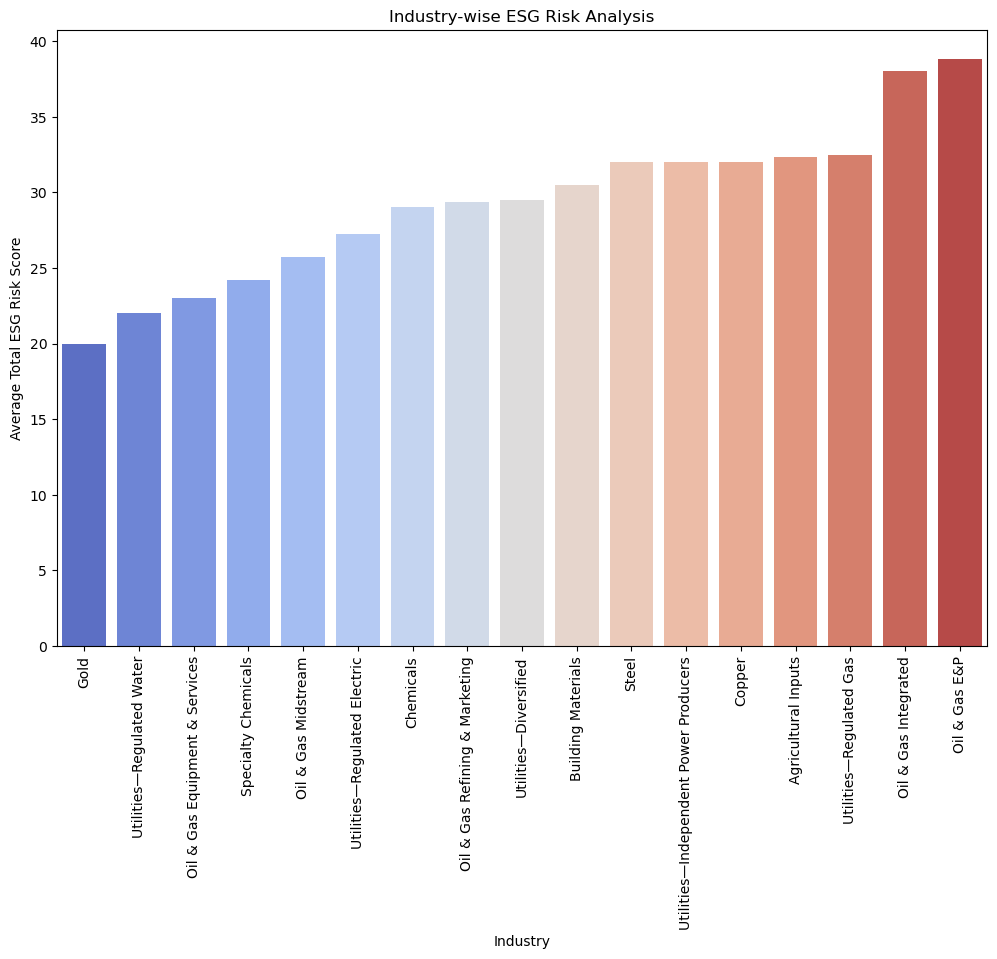

In [25]:
# Create a bar plot for the industry-wise average ESG risk scores
industry_total = esg[esg['Sector'].isin(['Energy', 'Utilities', 'Basic Materials'])].groupby('Industry')['Total ESG Risk score'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_total.index, y=industry_total.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Industry-wise ESG Risk Analysis')
plt.xlabel('Industry')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

In [26]:
# combined scores analysis
industry_avg_scores = esg[esg['Sector'].isin(['Real Estate', 'Technology', 'Consumer Defensive'])].groupby('Industry')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()
custom_colors = {
    'Environment Risk Score':'skyblue',
    'Governance Risk Score':'salmon',
    'Social Risk Score': "lightgreen"
}

fig_industry = px.bar(industry_avg_scores, x='Industry', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                      title='Industry-wise Average ESG Scores',
                      labels={'value': 'Average Score', 'variable': 'ESG Component'},
                      color_discrete_map=custom_colors) 

fig_industry.update_xaxes(categoryorder='total ascending')
fig_industry.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig_industry.show()

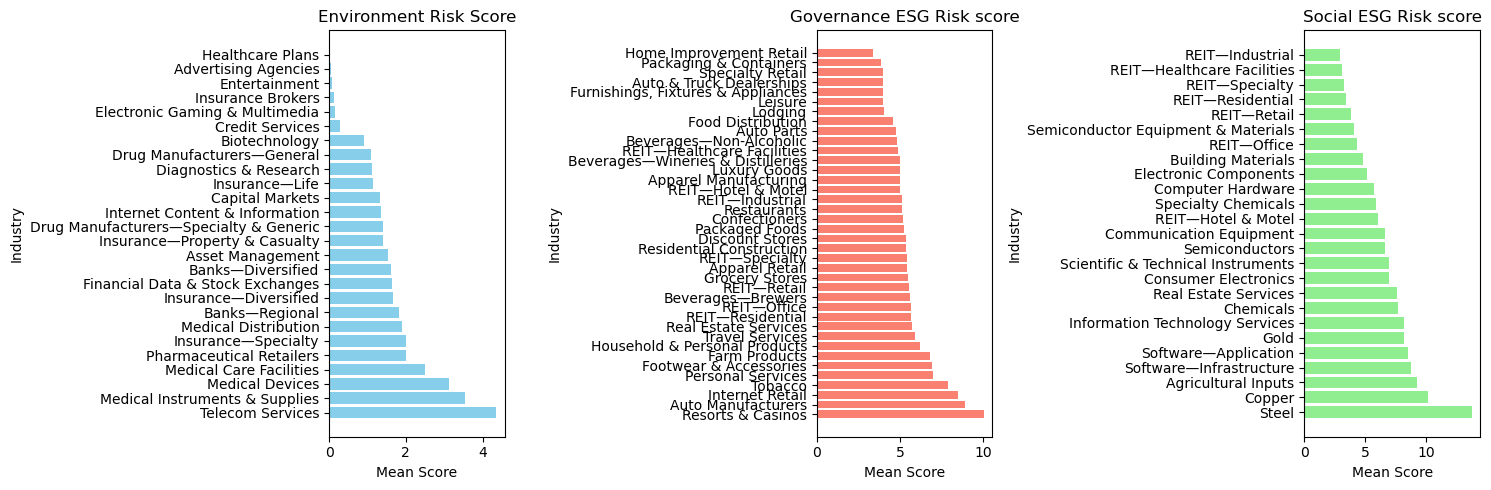

In [27]:
# subplot of ESG based on industry (only choose the top 3 sector based on the result above)
industry_E = esg[esg['Sector'].isin(['Financial Services', 'Communication Services', 'Healthcare'])].groupby('Industry')['Environment Risk Score'].mean().sort_values(ascending=False) 
industry_S = esg[esg['Sector'].isin(['Consumer Cyclical', 'Real Estate', 'Consumer Defensive'])].groupby('Industry')['Governance Risk Score'].mean().sort_values(ascending=False) 
industry_G = esg[esg['Sector'].isin(['Real Estate', 'Technology', 'Basic Materials'])].groupby('Industry')['Social Risk Score'].mean().sort_values(ascending=False) 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Environment Risk Score
axs[0].barh(industry_E.index, industry_E.values, color='skyblue')
axs[0].set_title('Environment Risk Score')
axs[0].set_xlabel('Mean Score')
axs[0].set_ylabel('Industry')

# Governance ESG Risk score
axs[1].barh(industry_S.index, industry_S.values, color='salmon')
axs[1].set_title('Governance ESG Risk score')
axs[1].set_xlabel('Mean Score')
axs[1].set_ylabel('Industry')

# Social ESG Risk score
axs[2].barh(industry_G.index, industry_G.values, color='lightgreen')
axs[2].set_title('Social ESG Risk score')
axs[2].set_xlabel('Mean Score')
axs[2].set_ylabel('Industry')

plt.tight_layout()
plt.show()

# 3. Company & ESG

In [28]:
high_performer = esg.sort_values(by='Total ESG Risk score',ascending=False).head(10)
low_performer = esg.sort_values(by='Total ESG Risk score',ascending=True).head(10)

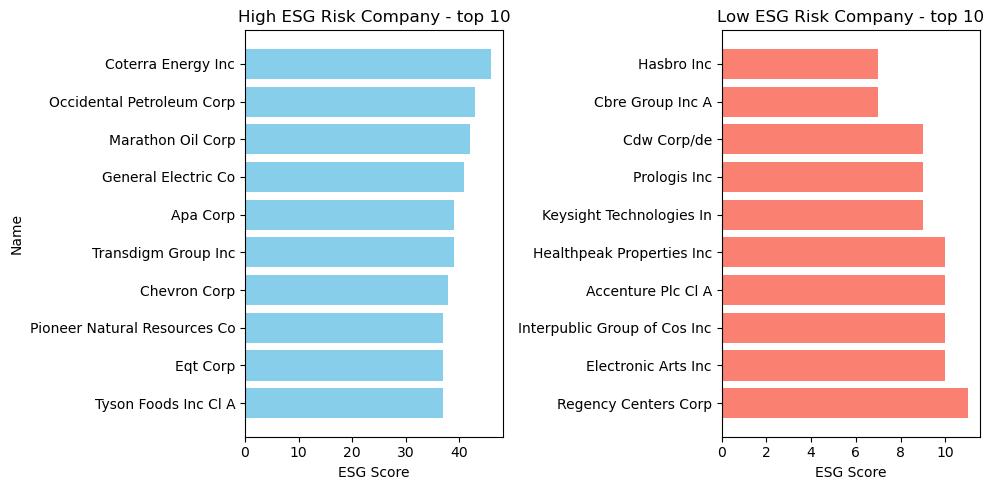

In [29]:
# subplot of ESG based on industry (only choose the top 3 sector based on the result above)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# High
high_performer = high_performer.sort_values(by='Total ESG Risk score', ascending=True)
axs[0].barh(high_performer['Name'], high_performer['Total ESG Risk score'], color='skyblue')
axs[0].set_title('High ESG Risk Company - top 10')
axs[0].set_xlabel('ESG Score')
axs[0].set_ylabel('Name')

# Low
low_performer = low_performer.sort_values(by='Total ESG Risk score', ascending=False)
axs[1].barh(low_performer['Name'], low_performer['Total ESG Risk score'], color='salmon')
axs[1].set_title('Low ESG Risk Company - top 10')
axs[1].set_xlabel('ESG Score')

plt.tight_layout()
plt.show()

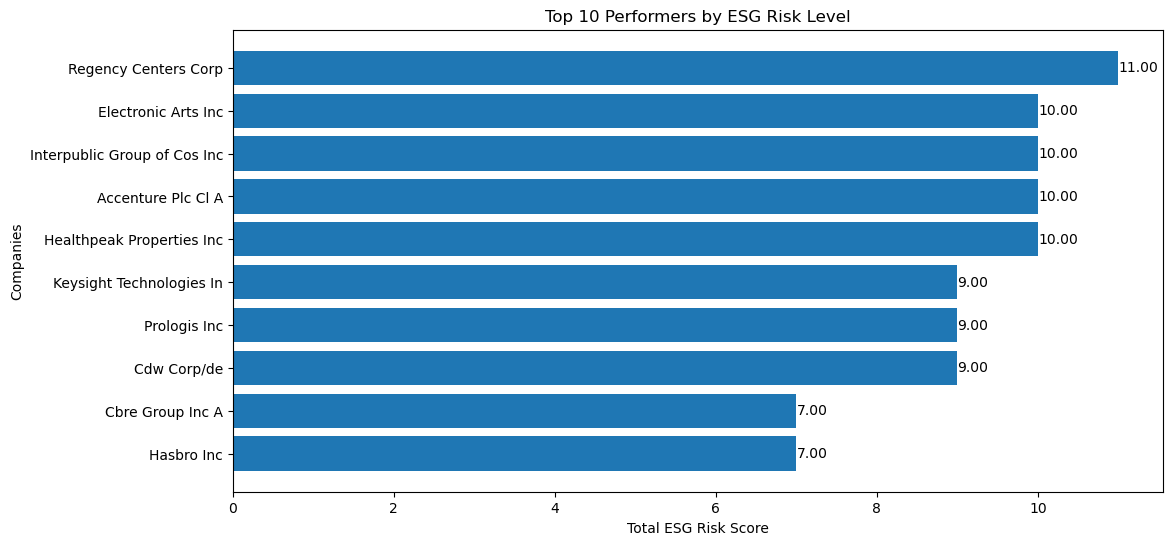

In [30]:
plt.figure(figsize=(12, 6))
bars = plt.barh(low_performer['Name'], low_performer['Total ESG Risk score'])

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center')

plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Top 10 Performers by ESG Risk Level')
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Market Value vs. Governance Risk Score')

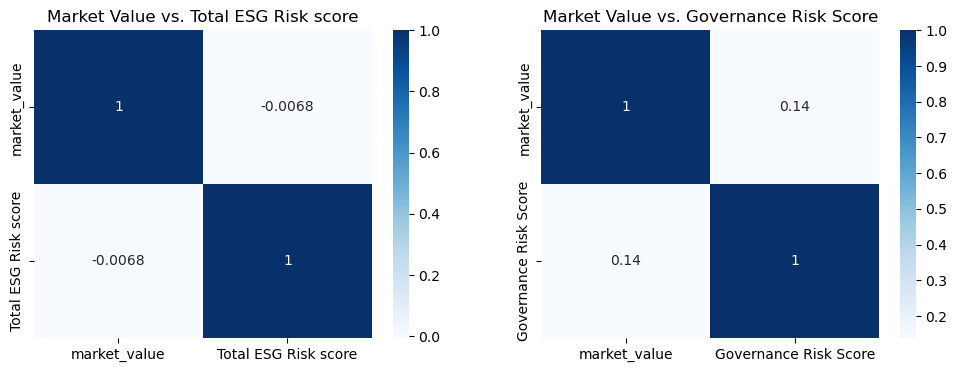

In [31]:
corr_market_value_esg = fin_esg[['market_value','Total ESG Risk score']].corr()
corr_market_value_gov = fin_esg[['market_value','Governance Risk Score']].corr()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Market Value vs. Total ESG Risk score
sns.heatmap(corr_market_value_esg, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Market Value vs. Total ESG Risk score')

# Market Value vs. Governance Risk Score
sns.heatmap(corr_market_value_gov, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Market Value vs. Governance Risk Score')

Text(0.5, 1.0, 'Revenue vs. Governance Risk Score')

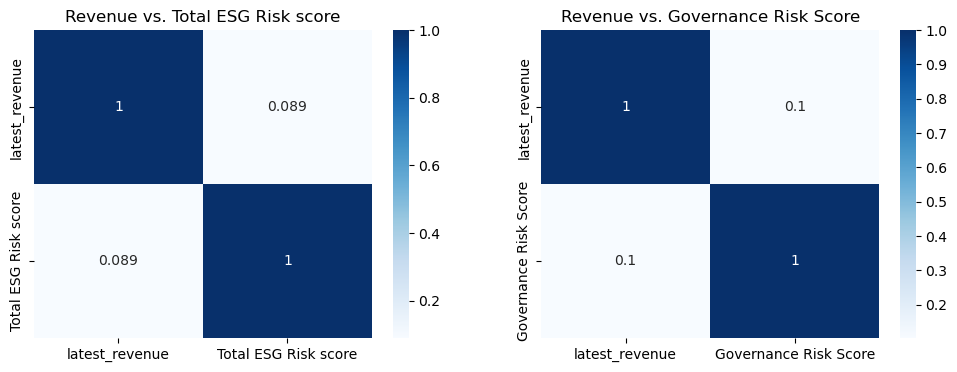

In [32]:
corr_rev_esg = fin_esg[['latest_revenue','Total ESG Risk score']].corr()
corr_rev_gov = fin_esg[['latest_revenue','Governance Risk Score']].corr()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Revenue vs. Total ESG Risk score
sns.heatmap(corr_rev_esg, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Revenue vs. Total ESG Risk score')

# Revenue vs. Governance Risk Score
sns.heatmap(corr_rev_gov, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Revenue vs. Governance Risk Score')

Text(0.5, 1.0, 'Stock Volatility vs. Governance Risk Score')

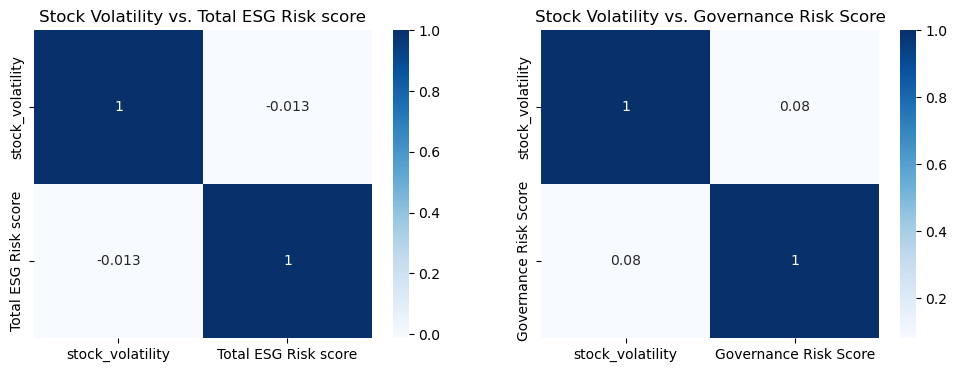

In [33]:
corr_stock_esg = fin_esg[['stock_volatility','Total ESG Risk score']].corr()
corr_stock_gov = fin_esg[['stock_volatility','Governance Risk Score']].corr()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Revenue vs. Total ESG Risk score
sns.heatmap(corr_stock_esg, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Stock Volatility vs. Total ESG Risk score')

# Revenue vs. Governance Risk Score
sns.heatmap(corr_stock_gov, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Stock Volatility vs. Governance Risk Score')